# EDA

In [97]:
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

alt.data_transformers.enable("data_server")
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

### Load the train and test data

In [51]:
train_df_raw = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

### Examine the number of samples

In [65]:
print("Number of train samples: ",train_df_raw.shape[0])
print("Number of test samples: ",test_df.shape[0])

Number of train examples:  75757
Number of test examples:  9705


### Examine the sample entries

In [53]:
train_df_raw.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [189]:
train_df_raw.query('days_below_20F >0')

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
390,2,State_1,Commercial,Education_Uncategorized,8558.0,NaN,NaN,61.0,19,46.316667,...,172,123,20,0,NaN,NaN,NaN,NaN,54.276474,390
394,2,State_1,Commercial,Education_Uncategorized,67501.0,NaN,NaN,796.1,15,45.693548,...,181,125,34,1,NaN,NaN,NaN,NaN,103.403022,394
395,2,State_1,Commercial,Education_Uncategorized,51551.0,NaN,NaN,796.1,15,45.693548,...,181,125,34,1,NaN,NaN,NaN,NaN,28.602182,395
396,2,State_1,Commercial,Education_Uncategorized,28777.0,NaN,NaN,796.1,15,45.693548,...,181,125,34,1,NaN,NaN,NaN,NaN,38.432503,396
398,2,State_1,Commercial,Education_Uncategorized,6050.0,NaN,NaN,506.6,15,38.274194,...,53,3,0,0,NaN,NaN,NaN,NaN,24.824587,398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74808,6,State_11,Commercial,Education_College_or_university,68072.0,1962.0,NaN,26.5,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,46.601514,74808
75061,6,State_11,Residential,2to4_Unit_Building,25380.0,1929.0,79.0,26.5,27,36.935484,...,16,0,0,0,NaN,NaN,NaN,NaN,78.145565,75061
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


In [54]:
train_df_raw.tail()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755
75756,6,State_11,Residential,2to4_Unit_Building,23888.0,1974.0,51.0,36.6,27,36.935484,...,16,0,0,0,NaN,NaN,NaN,NaN,29.154684,75756


### Check feature types

In [55]:
train_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

### Summary of missing values

In [57]:
miss_count = train_df_raw.isna().sum()
miss_dict = {'nan_count': miss_count, 'nan_pct': miss_count / len(train_df_raw)}
miss_df = pd.DataFrame(miss_dict).query("nan_count > 0")
miss_df

,nan_count,nan_pct
year_built,1837,0.024249
energy_star_rating,26709,0.352561
direction_max_wind_speed,41082,0.542287
direction_peak_wind_speed,41811,0.551909
max_wind_speed,41082,0.542287
days_with_fog,45796,0.604512


### 10 features with least unique values

In [184]:
col_least_nunique = train_df_raw.nunique().sort_values().head(10)
col_least_nunique

building_class                2
Year_Factor                   6
State_Factor                  7
direction_peak_wind_speed     8
days_above_110F               9
direction_max_wind_speed     10
max_wind_speed               16
days_below_0F                19
days_below_10F               30
august_min_temp              31
dtype: int64

In [151]:
title = alt.TitleParams(text="", subtitle="")

least_nunique_count_plot = (
    alt.Chart(train_df_raw, title=title)
    .mark_bar(size=10)
    .encode(
        x=alt.X(alt.repeat("repeat")),
        y="count()",
    )
    .properties(width=150, height=150)
    .repeat(
        columns=4,
        repeat=col_least_nunique.index.tolist(),
    )
)

facility_count_plot = (
    alt.Chart(train_df_raw, title=title)
    .mark_bar(size=10)
    .encode(
        y=alt.Y("facility_type", sort='x'),
        x="count()",
    )
    .properties(width=500)
)

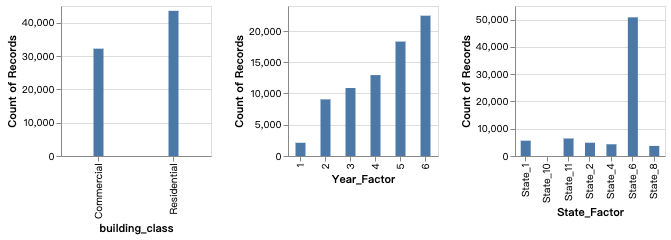

In [153]:
least_nunique_count_plot

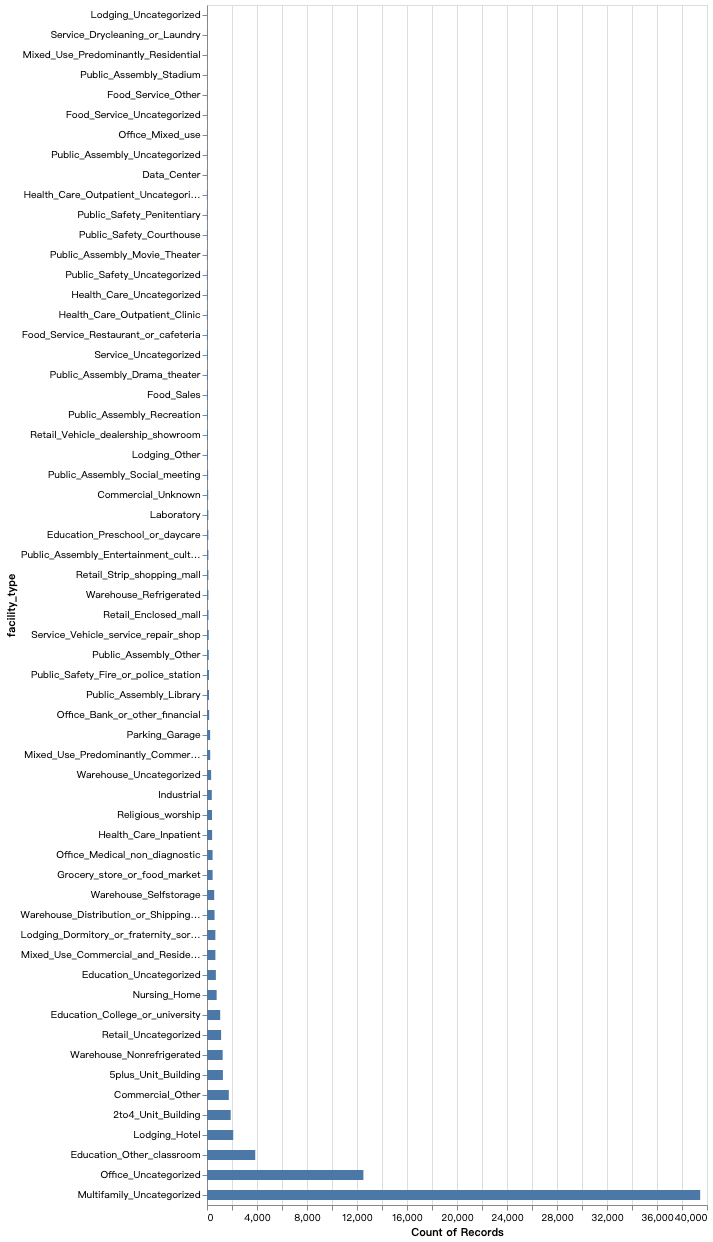

In [152]:
facility_count_plot

### Correlation Matrix

<AxesSubplot:>

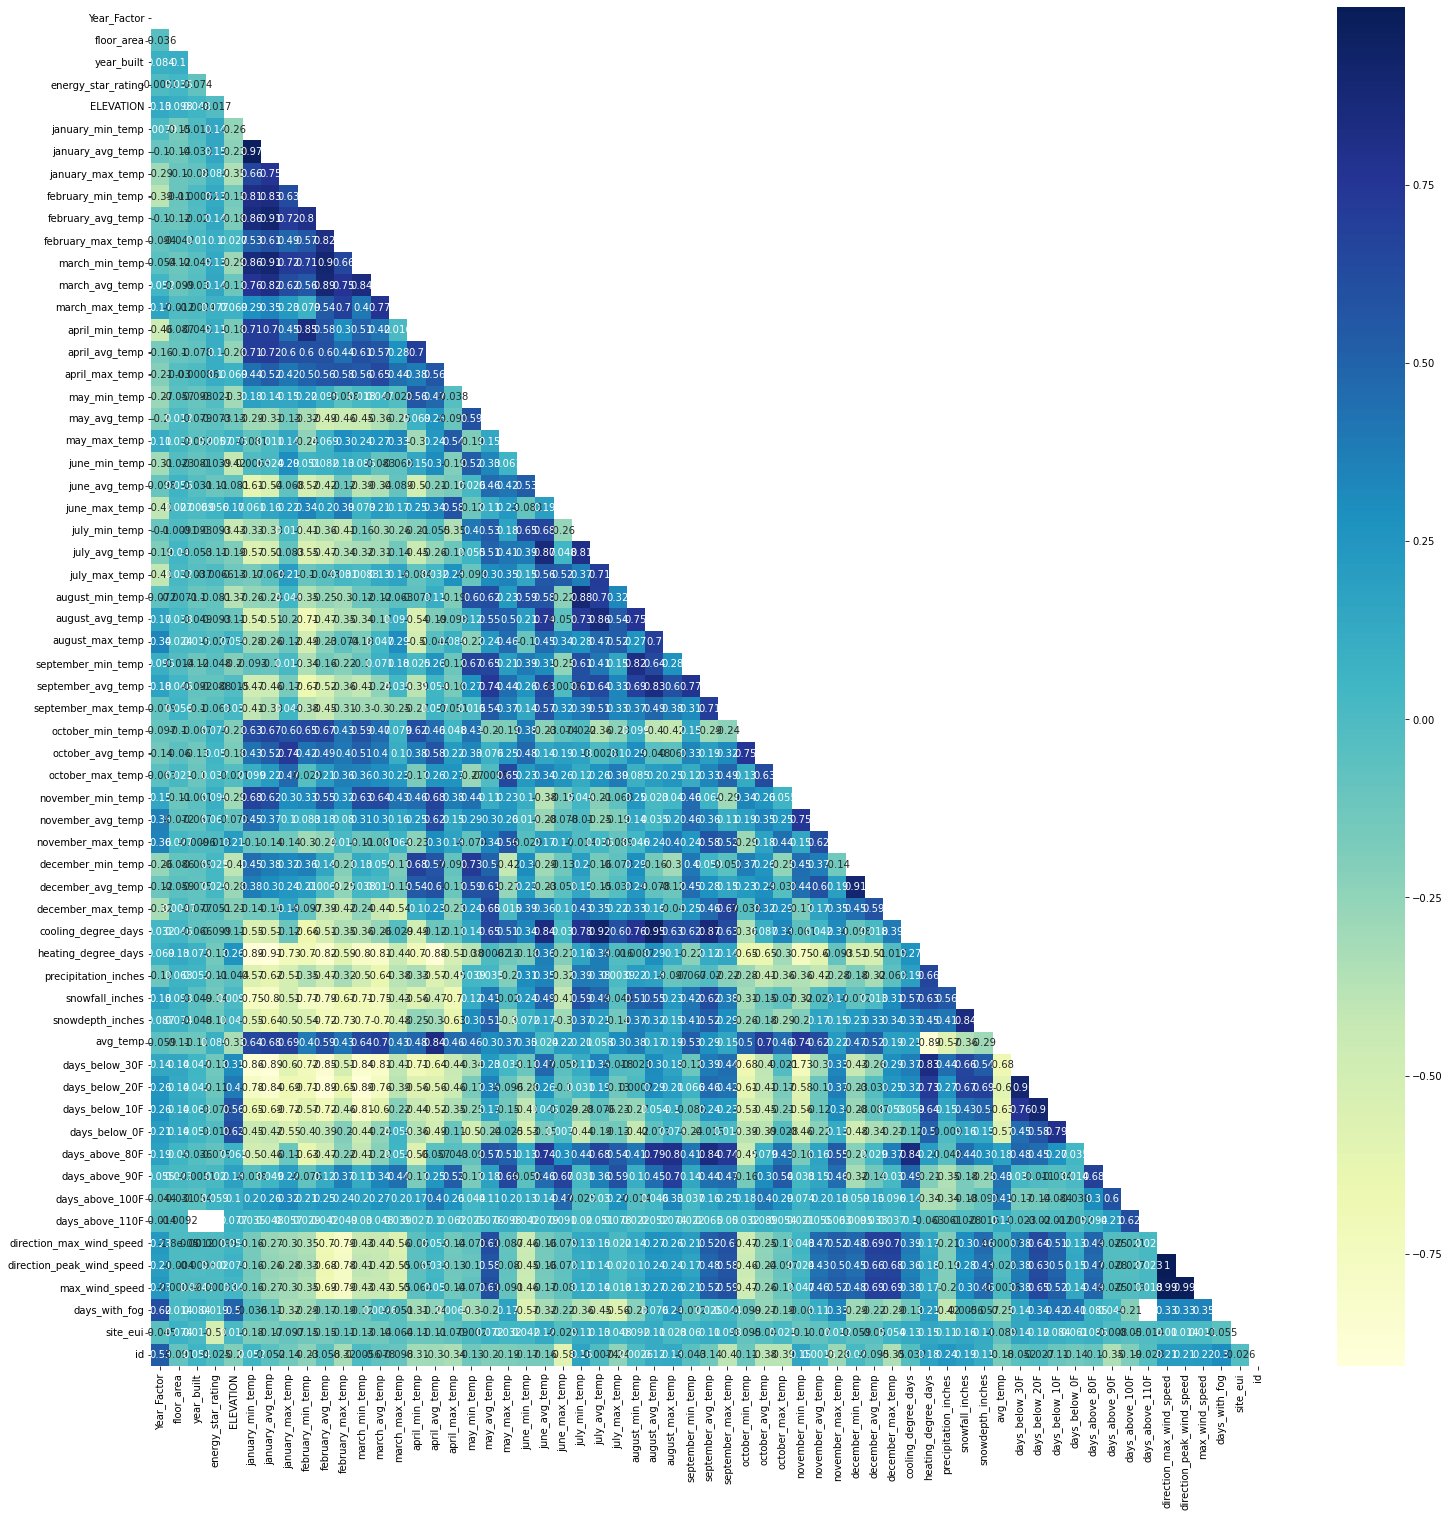

In [98]:
numeric_cols = (
    train_df_raw.select_dtypes(include=["int64", "float64"])
    .drop(columns=["id"])
    .columns.values
)

plt.figure(figsize = (25,25))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, cmap="YlGnBu", annot=True)

### Relationship between year_factor and site_eui

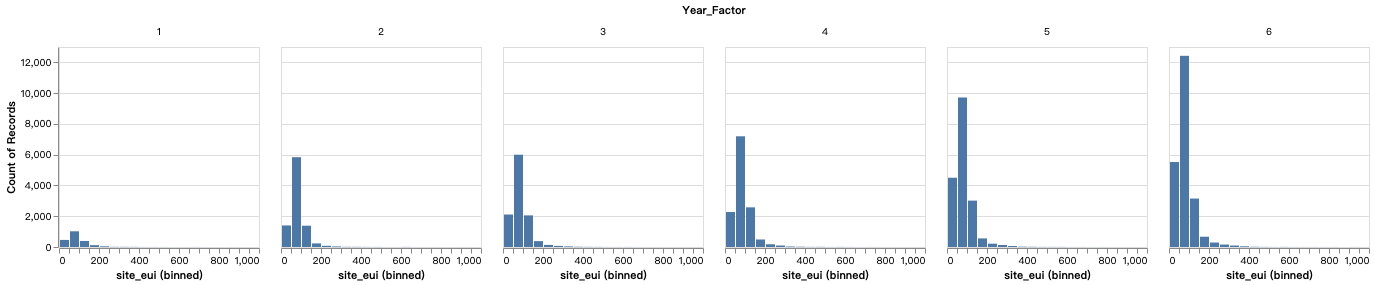

In [186]:
alt.Chart(train_df_raw).mark_bar().encode(
    x=alt.X('site_eui', bin=alt.Bin(maxbins=30)),
    y='count()',
).properties(
    width=200, height=200
).facet('Year_Factor')

### Relationship between year built and site_eui

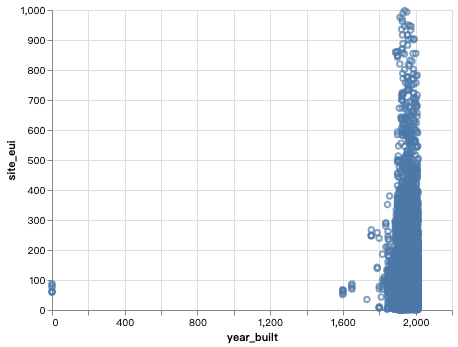

In [68]:
alt.Chart(train_df_raw).mark_point().encode(
    alt.X('year_built'),
    y='site_eui'
)

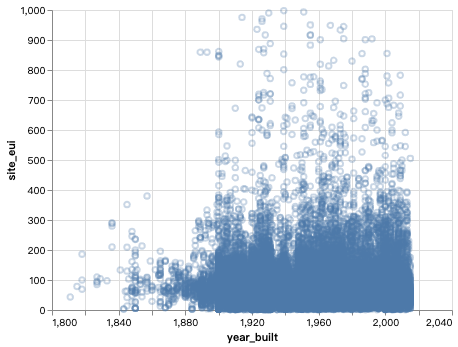

In [73]:
alt.Chart(train_df_raw.query('year_built>1800')).mark_point(opacity=0.3).encode(
    alt.X('year_built', scale=alt.Scale(domain=(1800, 2021))),
    y='site_eui'
)

## Relationship between year_built and mean of site_eui

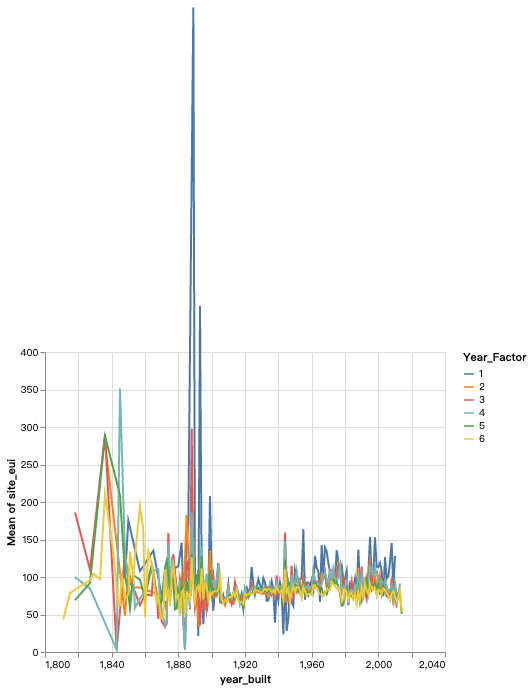

In [194]:
alt.Chart(train_df_raw.query('year_built>1800')).mark_line().encode(
    x=alt.X('year_built', scale=alt.Scale(domain=(1800, 2021))),
    y=alt.Y('mean(site_eui)', scale=alt.Scale(domain=(0, 400))),
    color='Year_Factor:N'
)

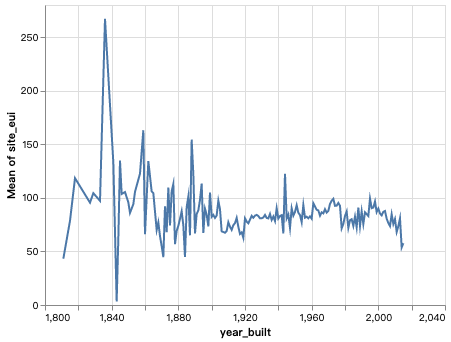

In [193]:
alt.Chart(train_df_raw.query('year_built>1800')).mark_line().encode(
    x=alt.X('year_built', scale=alt.Scale(domain=(1800, 2021))),
    y=alt.Y('mean(site_eui)'),
 #   color='Year_Factor:N'
)

## Relationship between energy_star_rating and mean of site_eui

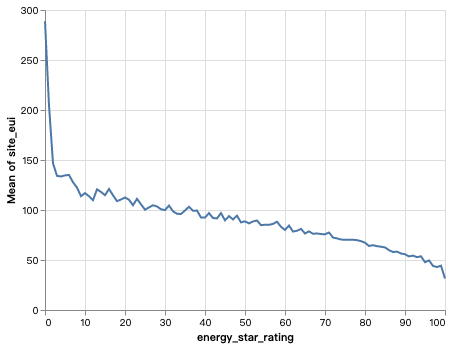

In [183]:
alt.Chart(train_df_raw).mark_line().encode(
    alt.X('energy_star_rating'),
    y='mean(site_eui)'
)